In [1]:
from datetime import datetime
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
import numpy as np 
import seaborn

In [9]:
df = pd.read_csv(r'C:\Users\91824\Downloads\MSFT (1).csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064783,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065899,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064224,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063107,47894400


In [11]:
df.shape


(8525, 7)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8525 entries, 0 to 8524
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8525 non-null   object 
 1   Open       8525 non-null   float64
 2   High       8525 non-null   float64
 3   Low        8525 non-null   float64
 4   Close      8525 non-null   float64
 5   Adj Close  8525 non-null   float64
 6   Volume     8525 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 466.3+ KB


In [13]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8525.000000,8525.000000,8525.000000,8525.000000,8525.000000,8.525000e+03
mean,28.220247,28.514473,27.918967,28.224480,23.417934,6.045692e+07
std,28.626752,28.848988,28.370344,28.626571,28.195330,3.891225e+07
min,0.088542,0.092014,0.088542,0.090278,0.058081,2.304000e+06
25%,3.414063,3.460938,3.382813,3.414063,2.196463,3.667960e+07
50%,26.174999,26.500000,25.889999,26.160000,18.441576,5.370240e+07
75%,34.230000,34.669998,33.750000,34.230000,25.392508,7.412350e+07
max,159.449997,160.729996,158.330002,160.619995,160.619995,1.031789e+09


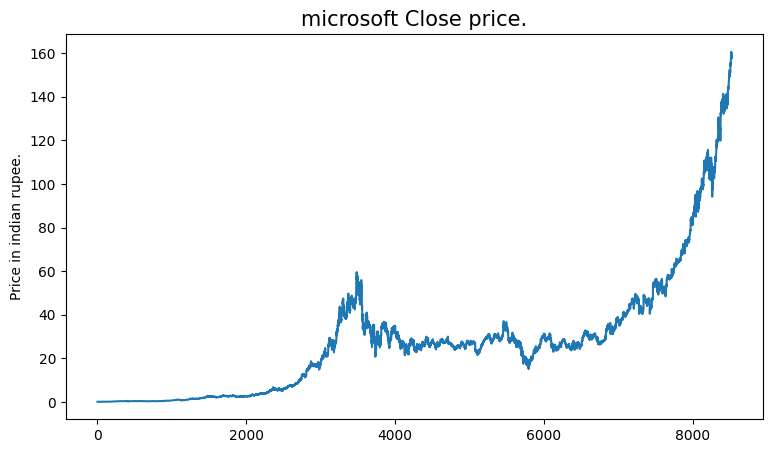

In [27]:
plt.figure(figsize=(9,5))
plt.plot(df['Close'])
plt.title('microsoft Close price.', fontsize=15)
plt.ylabel('Price in indian rupee.')
plt.show()

In [36]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

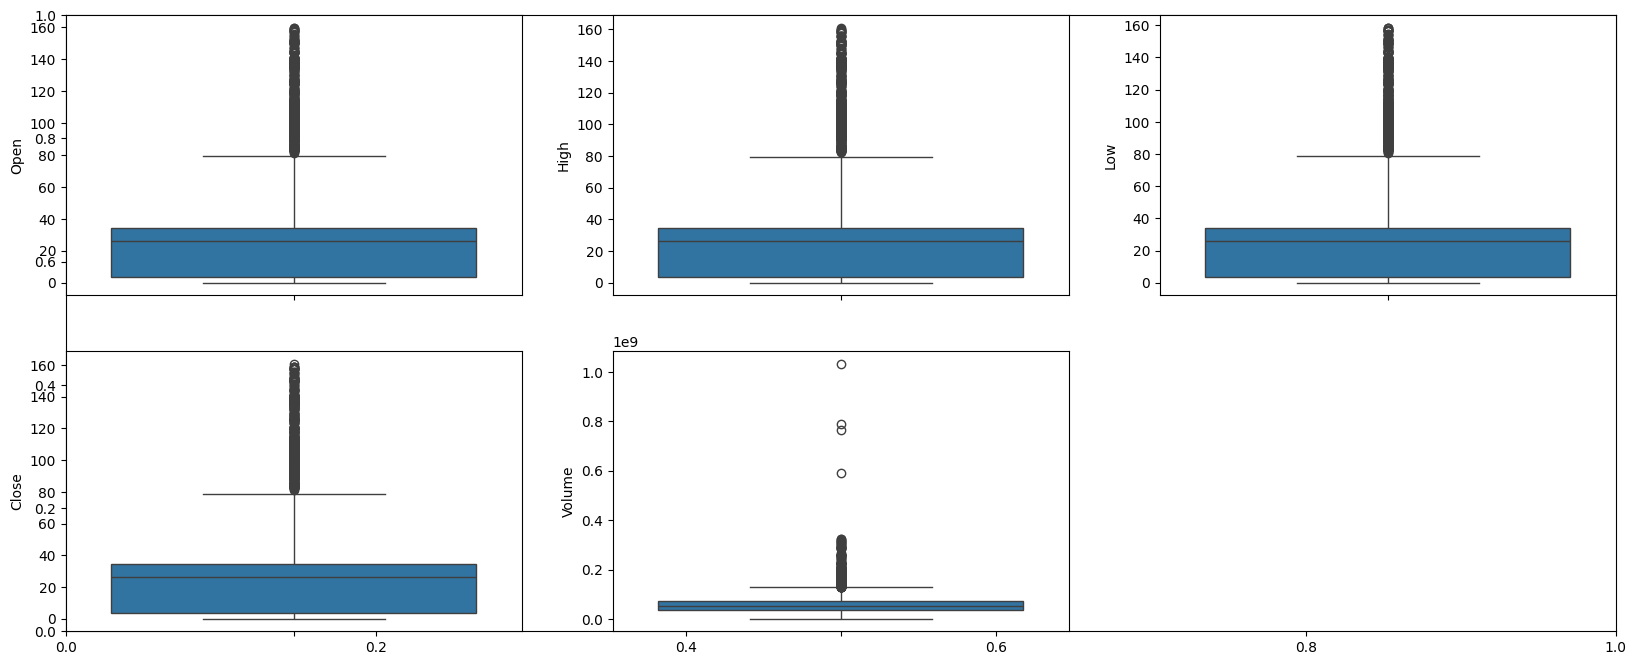

In [45]:
plt.subplots(figsize=(20,8))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sn.boxplot(df[col])
plt.show()

In [1]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()